## WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response=requests.get(city_url)
        
        
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amnat charoen
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | zaozersk
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | rimouski
Processing Record 8 of Set 1 | plainview
Processing Record 9 of Set 1 | pacocha
Processing Record 10 of Set 1 | acarau
Processing Record 11 of Set 1 | ciudad melchor muzquiz
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | nemuro
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | dudinka
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | tromso
Processing Record 18 of Set 1 | lazaro cardenas
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | kingston
Processing Recor

Processing Record 39 of Set 4 | pangai
Processing Record 40 of Set 4 | altay
Processing Record 41 of Set 4 | rohru
Processing Record 42 of Set 4 | egilsstadir
Processing Record 43 of Set 4 | brades
Processing Record 44 of Set 4 | jiayuguan
Processing Record 45 of Set 4 | whitehorse
Processing Record 46 of Set 4 | tweed heads
Processing Record 47 of Set 4 | sovetskaya gavan'
Processing Record 48 of Set 4 | tafuna
Processing Record 49 of Set 4 | el charco
Processing Record 0 of Set 5 | tamanrasset
Processing Record 1 of Set 5 | ryotsu-minato
Processing Record 2 of Set 5 | happy valley-goose bay
Processing Record 3 of Set 5 | namibe
Processing Record 4 of Set 5 | una
Processing Record 5 of Set 5 | nabire
Processing Record 6 of Set 5 | mogadishu
Processing Record 7 of Set 5 | shanhecun
Processing Record 8 of Set 5 | ilulissat
Processing Record 9 of Set 5 | ust-nera
Processing Record 10 of Set 5 | polyarnyy
Processing Record 11 of Set 5 | datong
Processing Record 12 of Set 5 | al burayqah
P

Processing Record 30 of Set 8 | beyneu
Processing Record 31 of Set 8 | naze
Processing Record 32 of Set 8 | tolanaro
Processing Record 33 of Set 8 | lorengau
Processing Record 34 of Set 8 | mafinga
Processing Record 35 of Set 8 | jwaneng
Processing Record 36 of Set 8 | lobito
Processing Record 37 of Set 8 | arrifes
Processing Record 38 of Set 8 | cabo san lucas
Processing Record 39 of Set 8 | mil'kovo
Processing Record 40 of Set 8 | aldan
Processing Record 41 of Set 8 | bam
Processing Record 42 of Set 8 | balakliya
Processing Record 43 of Set 8 | gobabis
Processing Record 44 of Set 8 | iquique
Processing Record 45 of Set 8 | chongwe
Processing Record 46 of Set 8 | plettenberg bay
Processing Record 47 of Set 8 | la passe
Processing Record 48 of Set 8 | walvis bay
Processing Record 49 of Set 8 | kerikeri
Processing Record 0 of Set 9 | anzio
Processing Record 1 of Set 9 | igbo-ora
Processing Record 2 of Set 9 | spring lake
Processing Record 3 of Set 9 | fuerte olimpo
Processing Record 4 o

Processing Record 16 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 17 of Set 12 | derbent
Processing Record 18 of Set 12 | mizdah
Processing Record 19 of Set 12 | dongkan
Processing Record 20 of Set 12 | poronaysk
Processing Record 21 of Set 12 | corn island
Processing Record 22 of Set 12 | acapulco de juarez
Processing Record 23 of Set 12 | hobyo
Processing Record 24 of Set 12 | takoradi
Processing Record 25 of Set 12 | hawkinsville
Processing Record 26 of Set 12 | qarauyl
Processing Record 27 of Set 12 | north bend
Processing Record 28 of Set 12 | tazacorte
Processing Record 29 of Set 12 | tsiombe
Processing Record 30 of Set 12 | arsen'yev
Processing Record 31 of Set 12 | itaituba
Processing Record 32 of Set 12 | suoyarvi
Processing Record 33 of Set 12 | tadine
Processing Record 34 of Set 12 | graaff-reinet
Processing Record 35 of Set 12 | west bay
Processing Record 36 of Set 12 | mersa matruh
Processing Record 37 of Set 12 | delijan
Processing Record 38 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,amnat charoen,15.9167,104.7500,27.93,61,32,1.25,TH,1682621241
1,portland,45.5234,-122.6762,21.45,61,75,1.79,US,1682620710
2,zaozersk,69.4005,32.4476,-1.98,91,20,4.84,RU,1682620832
3,bilibino,68.0546,166.4372,-13.70,84,11,1.46,RU,1682620710
4,bredasdorp,-34.5322,20.0403,15.44,77,11,3.31,ZA,1682621243


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amnat charoen,15.9167,104.7500,27.93,61,32,1.25,TH,1682621241
1,portland,45.5234,-122.6762,21.45,61,75,1.79,US,1682620710
2,zaozersk,69.4005,32.4476,-1.98,91,20,4.84,RU,1682620832
3,bilibino,68.0546,166.4372,-13.70,84,11,1.46,RU,1682620710
4,bredasdorp,-34.5322,20.0403,15.44,77,11,3.31,ZA,1682621243


# Create the Scatter Plots Requested

## Latitude Vs. Temperature

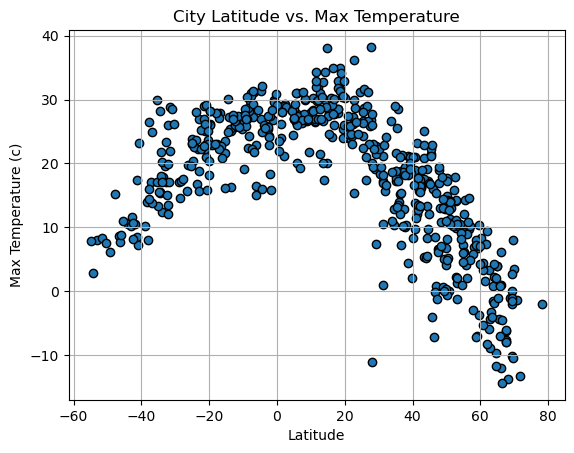

In [8]:
# Build scatter plot for latitude vs. temperature
x_lat = city_data_df.Lat
y_temp = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x_lat,y_temp, marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude Vs. Humidity

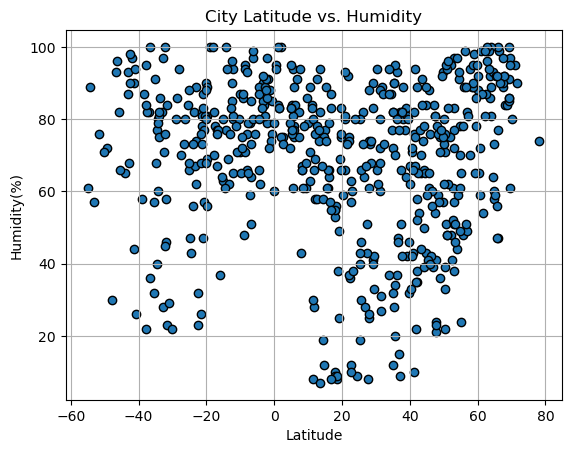

In [9]:
# Build scatter plot for latitude vs. temperature
x_lat = city_data_df.Lat
y_hum = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_lat,y_hum, marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude Vs. Cloudiness

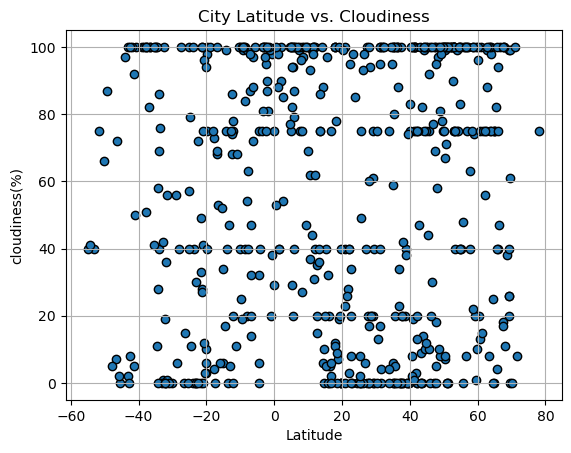

In [10]:
# Build scatter plot for latitude vs. temperature
x_lat = city_data_df.Lat
y_cloud = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_lat,y_cloud, marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

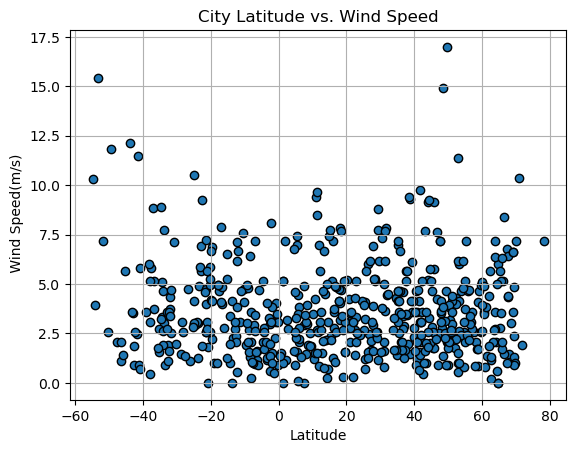

In [11]:
# Build scatter plot for latitude vs. temperature
x_lat = city_data_df.Lat
y_WS = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_lat,y_WS, marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel(" Wind Speed(m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = stats.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amnat charoen,15.9167,104.7500,27.93,61,32,1.25,TH,1682621241
1,portland,45.5234,-122.6762,21.45,61,75,1.79,US,1682620710
2,zaozersk,69.4005,32.4476,-1.98,91,20,4.84,RU,1682620832
3,bilibino,68.0546,166.4372,-13.70,84,11,1.46,RU,1682620710
6,rimouski,48.4488,-68.5240,10.82,59,97,1.36,CA,1682620667


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,bredasdorp,-34.5322,20.0403,15.44,77,11,3.31,ZA,1682621243
5,port-aux-francais,-49.3500,70.2167,6.13,72,87,11.85,TF,1682621243
8,pacocha,-17.5833,-71.3333,23.08,78,0,4.63,PE,1682621245
9,acarau,-2.8856,-40.1200,25.59,84,100,3.30,BR,1682620953
15,edinburgh of the seven seas,-37.0676,-12.3116,17.10,82,82,8.83,SH,1682621248


## Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8523847762568608


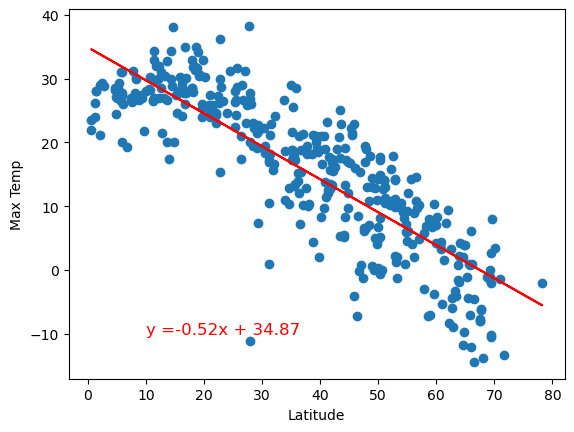

In [15]:
x_values = northern_hemi_df["Lat"].rename("Latitude")
y_values = northern_hemi_df["Max Temp"]
linear_regress(x_values, y_values, (10, -10))

The r-value is: 0.7431783607732065


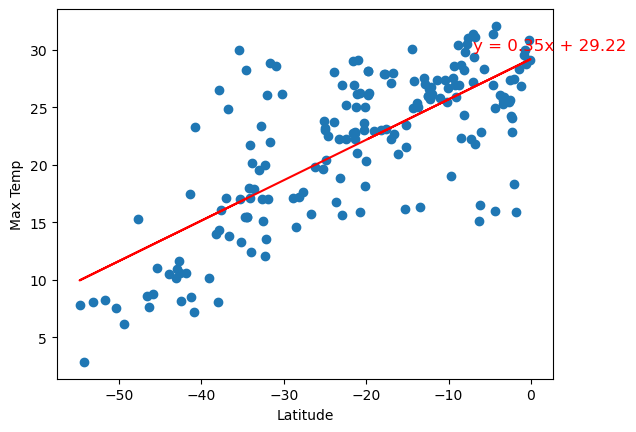

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].rename("Latitude")
y_values = southern_hemi_df["Max Temp"]
linear_regress(x_values, y_values,(-7,30 ))

### Discussion about the linear relationship: In the northern hemisphere the coorealation between Max Temp and Latitude is negative, which means as the latitude increases, max temp decreases. While in southeren hemisphere  the coorealation between Max Temp and Latitude is positive, which means as the latitude increases, max temp also increases. 

### All this refers to the fact that the Earth is hottest at the Equator and coldest at the Poles.

## Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15846406581560227


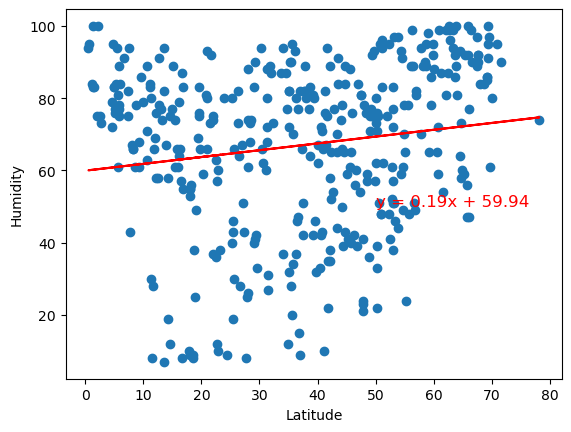

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].rename("Latitude")
y_values = northern_hemi_df["Humidity"]
linear_regress(x_values, y_values,(50,50))

The r-value is: 0.19291621423868105


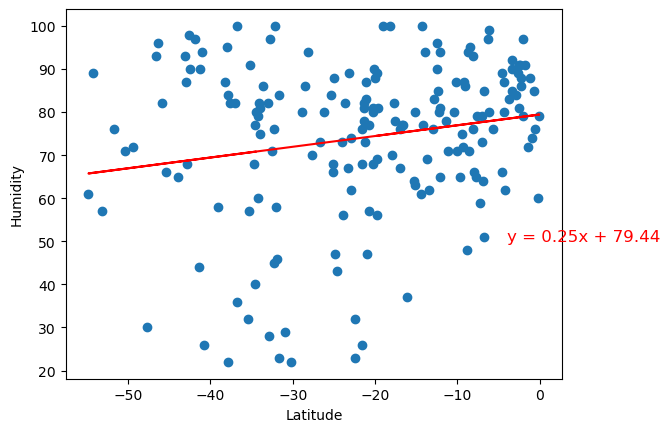

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].rename("Latitude")
y_values = southern_hemi_df["Humidity"]
linear_regress(x_values, y_values,(-4, 50))

### Discussion about the linear relationship: In the both northern and southeren hemisphere as the Latitude increases, humidity also increases but the slope is very less. There is a positive coorelation in both cases.

## Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0522615608553364


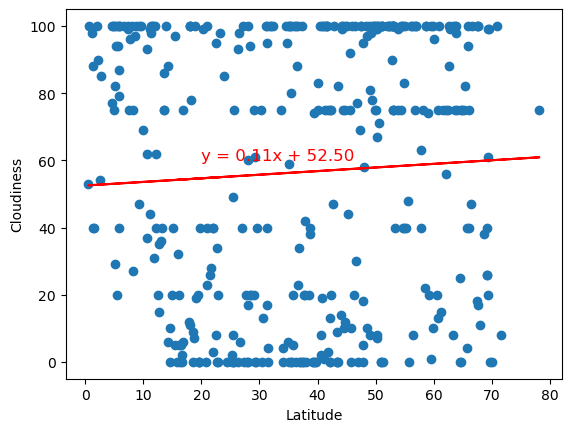

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].rename("Latitude")
y_values = northern_hemi_df["Cloudiness"]
linear_regress(x_values, y_values,(20, 60))

The r-value is: 0.15182714781316944


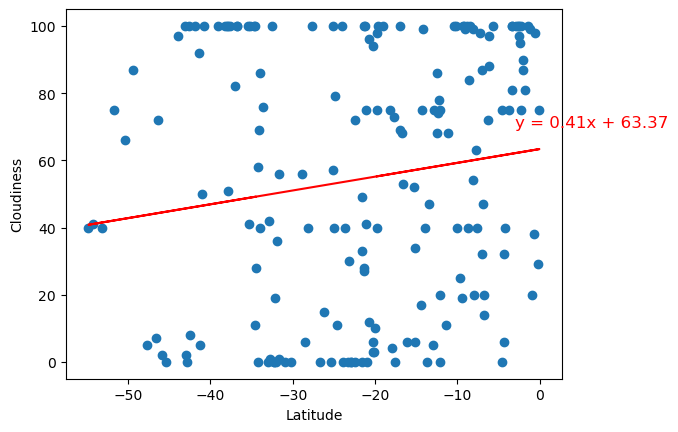

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].rename("Latitude")
y_values = southern_hemi_df["Cloudiness"]
linear_regress(x_values, y_values,(-3, 70))

### Discussion about the linear relationship: In the both northern and southeren hemisphere as the Latitude increases, cloudiness also increases but the slope is very less. There is a positive coorelation in both cases.

## Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03882582776998679


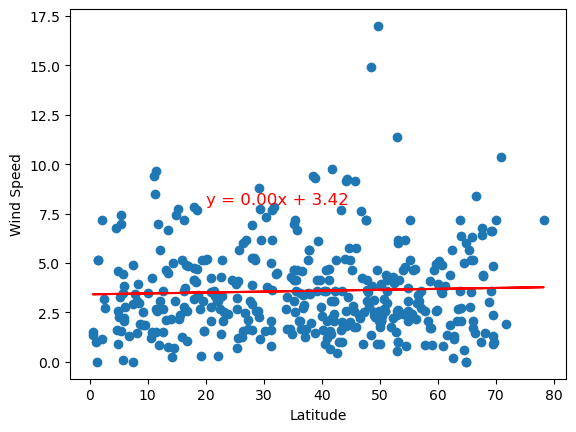

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].rename("Latitude")
y_values = northern_hemi_df["Wind Speed"]
linear_regress(x_values, y_values,(20, 8))

The r-value is: -0.26969617974271376


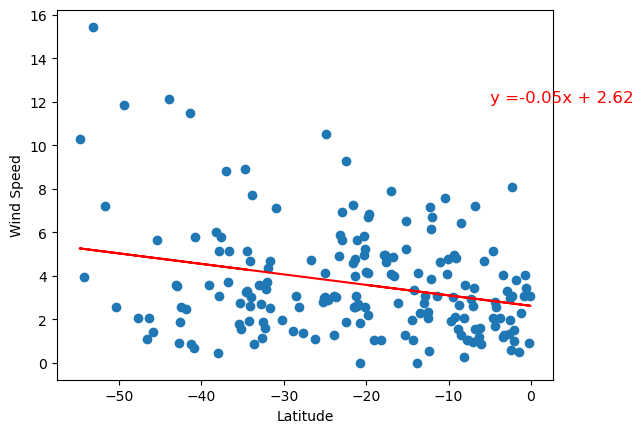

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].rename("Latitude")
y_values = southern_hemi_df["Wind Speed"]
linear_regress(x_values, y_values, (-5, 12))

### Discussion about the linear relationship: There is no correlation between latitude and wind speed either, for both hemispheres. 